# World Happiness Score Prediction Using Linear Regression and Random Forest Regressor

- Project Title : World Happiness Score Prediction Using Machine Learning
- Group Number : 15
- Group Members:
    - EG/2021/4599 - Karunarathna J. S.
    - EG/2021/4604 - Karunathilake A. D. H.

# 1. Introduction

- The World Happiness Report is an annual survey on human well-being and happiness for the citizens of the world. This dataset comes from a large, international survey done by Gallup in which people are asked to evaluate their overall quality of life on a scale, known as the "Cantril Ladder." On this scale, it asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. They are then asked to rate their own current lives on that 0 to 10 scale. It also considers how various factors relate to happiness across nations, such as economic production, social support, life expectancy, freedom, generosity, and absence of corruption.

- In this project, the goal is to develop two machine learning models that can predict the happiness score for each country based on these contributing factors. Understanding how these factors relate to the happiness score will help policymakers and organizations create plans that improve the well-being of their citizens. With an accurate prediction of happiness scores, we aim to go deeper into the elements of happiness and assess their relative importance in global well-being.

# 2. Literature Survey
- The concept of measuring happiness at the global level has been on the radar of policymakers and researchers for about a decade now. The **World Happiness Report**, initiated in 2012, has been the go-to document for policymakers and researchers looking to understand trends in well-being across the globe. It draws on data from Gallup's World Poll to assess life satisfaction and the determinants of happiness. Every year, economists and psychologists sort through these reports to give suggestions on how to increase well-being based on empirical evidence.

- Many studies have been conducted on economic and social variables in relation to happiness. For example, *Easterlin (1974)* introduced what is known as the **Easterlin Paradox**; that while richer countries tend to have higher happiness scores, there seems to be no conclusive correlation between income increases and lasting increases in happiness. In later years, research focus has shifted toward measuring non-economic aspects such as social support, mental health, and community engagement as far more important measures of well-being (*Layard, 2005*).

- Similarly, machine learning techniques have been applied to the prediction of happiness scores using models such as linear regression, decision trees, and random forests. These models seek a relationship between measurable national indicator, GDP per capita or life expectancy, for example and reported happiness scores. Although economic variables such as GDP per capita are important determinants of happiness, factors like **freedom** and **corruption** also prove essential to accounting for differences in happiness among nations (*Helliwell et al., 2020*).

- The objective of this project is to develop two machine learning models that would interpret the relationship between the contributing factors found in the World Happiness dataset and predict happiness scores for countries around the world. Moreover, these models could be used to determine which variables have the biggest effect on national happiness, hence it will be useful for policies to improve global well-being.

# 3. Dataset Description
- Link to dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data

- The dataset used in this project is sourced from the **World Happiness Report** and includes data for the years 2015 to 2019, covering over 150 countries. It is composed of multiple columns that represent both the happiness score and the contributing factors to each country's score. The primary columns are shown in the below table.


| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Country**            | Name of the country                                                         |
| **Happiness Score**    | The Cantril ladder score for the country (0 to 10)                           |
| **GDP per Capita**     | The economic contribution to happiness                                      |
| **Family**             | Represents social support within the country                                |
| **Life Expectancy**    | Health metric based on average life expectancy                              |
| **Freedom**            | The perceived freedom to make life choices                                  |
| **Generosity**         | The country's generosity as measured by charitable giving                   |
| **Trust (Government Corruption)** | Perceptions of corruption in the government                      |
| **Dystopia Residual**  | The unexplained component of the happiness score, using Dystopia as a base   |

- The contributing factors are added up in order to give an overall score of a country's happiness. Each factor measures the effects of various social, economic, and health-related dimensions on the general happiness of its population.

- It represents a good opportunity to try to examine the relationship between these variables by using machine learning models for predicting scores related to happiness. Such knowledge of their relative contributions to happiness would offer substantial insight into worldwide patterns of well-being.

# 4. Data Preprocessing before EDA

## 4.1. Library Initialization

Essential data manipulation and visualization libraries were imported, including:

- pandas for data management
- numpy for numerical operations
- matplotlib and seaborn for visualization

In [82]:
# For visualization and statistics we first import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 4.2. Import Dataframes and Inspect the features
Next we import datasets from all 5 years into pandas dataframes separately.

In [83]:
# Load datasets from 2015 to 2019
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

# Print columns of each dataframe to inspect the features
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)


2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country or region'

## 4.3. Data Columns Standardization
Initial data loading revealed inconsistencies in column naming conventions and dataset structures across different years. To address this, a systematic preprocessing approach was implemented.
A comprehensive column renaming strategy was developed to ensure consistency across datasets. Key standardizations included:
- Unifying happiness-related metrics (e.g., 'Happiness Score' to 'Score')
- Standardizing economic indicators (e.g., 'GDP per Capita' to 'Economy')
- Aligning social and health-related metrics


In [84]:
# Rename column names for standardize
df_2015.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2016.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2017.rename(columns={
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Life expectancy',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Dystopia.Residual': 'Dystopia Residual',
}, inplace=True)

df_2018.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

df_2019.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score', 'Standard Error',
       'Economy', 'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Score', 'Whisker.high', 'Whisker.low',
       'Economy', 'Social support', 'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country', 'Score', 'Economy', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],

## 4.4. Feature Reduction
Now we have consistent column names for all five years of data sets. But we need to remove the unnecessary columns like Standard Error in 2015 data set, Region, Whisker.low Whisker.high etc.

Unnecessary columns were systematically removed to streamline the dataset:

- Eliminated rank-related columns
- Removed confidence interval indicators
- Deleted region-specific identifiers
- Removed statistical error columns

In [85]:
# Drop unnecessary columns from 2015 dataset
df_2015.drop(columns=['Happiness Rank','Region', 'Standard Error', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2016 dataset
df_2016.drop(columns=['Happiness Rank','Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2017 dataset
df_2017.drop(columns=['Happiness.Rank','Whisker.high', 'Whisker.low', 'Dystopia Residual'], inplace=True)

# Drop unwanted columns in 2018 and 2019
df_2018.drop(columns=['Overall rank'], inplace=True)
df_2019.drop(columns=['Overall rank'], inplace=True)

- For further confirmation the column names were printed again as shown below.

In [86]:
# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2018 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2019 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')


## 4.5. Dataset Consolidation
In the 5 years of data sets we only have limited number of records for one year. As a example for 2015, we have only 158 records. for 2016 we have only 157 records and for 2017, 2018 and 2019, we have 155, 156 and 156 records. It's hard to train a model for such a small data set because the model may not be able to capture the relations of the data. 
Given the limited sample size of individual year datasets as mentioned above, a data consolidation approach was adopted:

- Merged all five years of data into a single comprehensive dataframe
- Reset index to ensure data continuity
- Resulting in a unified dataset of 782 observations

In [87]:
# Merge all datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

# Reset index after merging
df_combined.reset_index(drop=True, inplace=True)

# Check the shape and first few rows of the combined dataset
print("Combined Dataset Shape:", df_combined.shape)
print(df_combined.head())

Combined Dataset Shape: (782, 8)
       Country  Score  Economy  Social support  Life expectancy  Freedom  \
0  Switzerland  7.587  1.39651         1.34951          0.94143  0.66557   
1      Iceland  7.561  1.30232         1.40223          0.94784  0.62877   
2      Denmark  7.527  1.32548         1.36058          0.87464  0.64938   
3       Norway  7.522  1.45900         1.33095          0.88521  0.66973   
4       Canada  7.427  1.32629         1.32261          0.90563  0.63297   

   Perceptions of corruption  Generosity  
0                    0.41978     0.29678  
1                    0.14145     0.43630  
2                    0.48357     0.34139  
3                    0.36503     0.34699  
4                    0.32957     0.45811  


## 4.6. Key Processing Outcomes
- Total Records: 782
- Feature Count: 7 (including target variable)
- Data Comprehensive: Covers World Happiness Report data from 2015-2019

So now we have 782 data points with 7 features and target.

# 5. Exploratory Data Analysis (EDA)
EDA involves investigating the dataset to uncover underlying patterns, anomalies, and relationships between variables. Before doing the analysis, we split the dataset into training and testing subsets to prevent data snooping, which ensures that the testing data remains unseen during model training.


### 5.1. Splitting the dataset

To prepare the data for analysis and modeling:

- Features and Target Separation: We split the dataset into features (independent variables) and the target variable (dependent variable). The Score column, representing happiness, is selected as the target, while other columns (excluding Country) are considered features.
- Train-Test Split: The dataset is divided into training and testing sets using an 80-20 split. The training data will be used for analysis and model training, while the testing set will evaluate the model's performance.

In [88]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target
X = df_combined.drop(columns=['Score','Country'])  # Adjust target column name if necessary
y = df_combined['Score']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (625, 6), Test shape: (157, 6)


## 5.2. Summery Statistics

A summary of the dataset provides an overview of the data's distribution, including:
- Measures of central tendency (mean, median).
- Variability (standard deviation, minimum, and maximum values).


In [89]:
# Summary statistics
print("Dataset Summary:\n")
print(df_combined.describe())

Dataset Summary:

            Score     Economy  Social support  Life expectancy     Freedom  \
count  782.000000  782.000000      782.000000       782.000000  782.000000   
mean     5.379018    0.916047        1.078392         0.612416    0.411091   
std      1.127456    0.407340        0.329548         0.248309    0.152880   
min      2.693000    0.000000        0.000000         0.000000    0.000000   
25%      4.509750    0.606500        0.869363         0.440183    0.309768   
50%      5.322000    0.982205        1.124735         0.647310    0.431000   
75%      6.189500    1.236187        1.327250         0.808000    0.531000   
max      7.769000    2.096000        1.644000         1.141000    0.724000   

       Perceptions of corruption  Generosity  
count                 781.000000  782.000000  
mean                    0.125436    0.218576  
std                     0.105816    0.122321  
min                     0.000000    0.000000  
25%                     0.054000    0.130000

From the summary statistics, we observed that the Perceptions of corruption feature has missing values. To confirm, we performed a null value check, which verified that this column contains a missing value. Addressing this issue will be part of the data preprocessing stage.

In [90]:
# Check for null values
print("Missing Values:\n")
print(df_combined.isnull().sum())

Missing Values:

Country                      0
Score                        0
Economy                      0
Social support               0
Life expectancy              0
Freedom                      0
Perceptions of corruption    1
Generosity                   0
dtype: int64


### 5.3. Distribution Analysis
To understand the distribution of numerical features:
- Histograms: Visualizations for each numeric column show the frequency and spread of data.
    

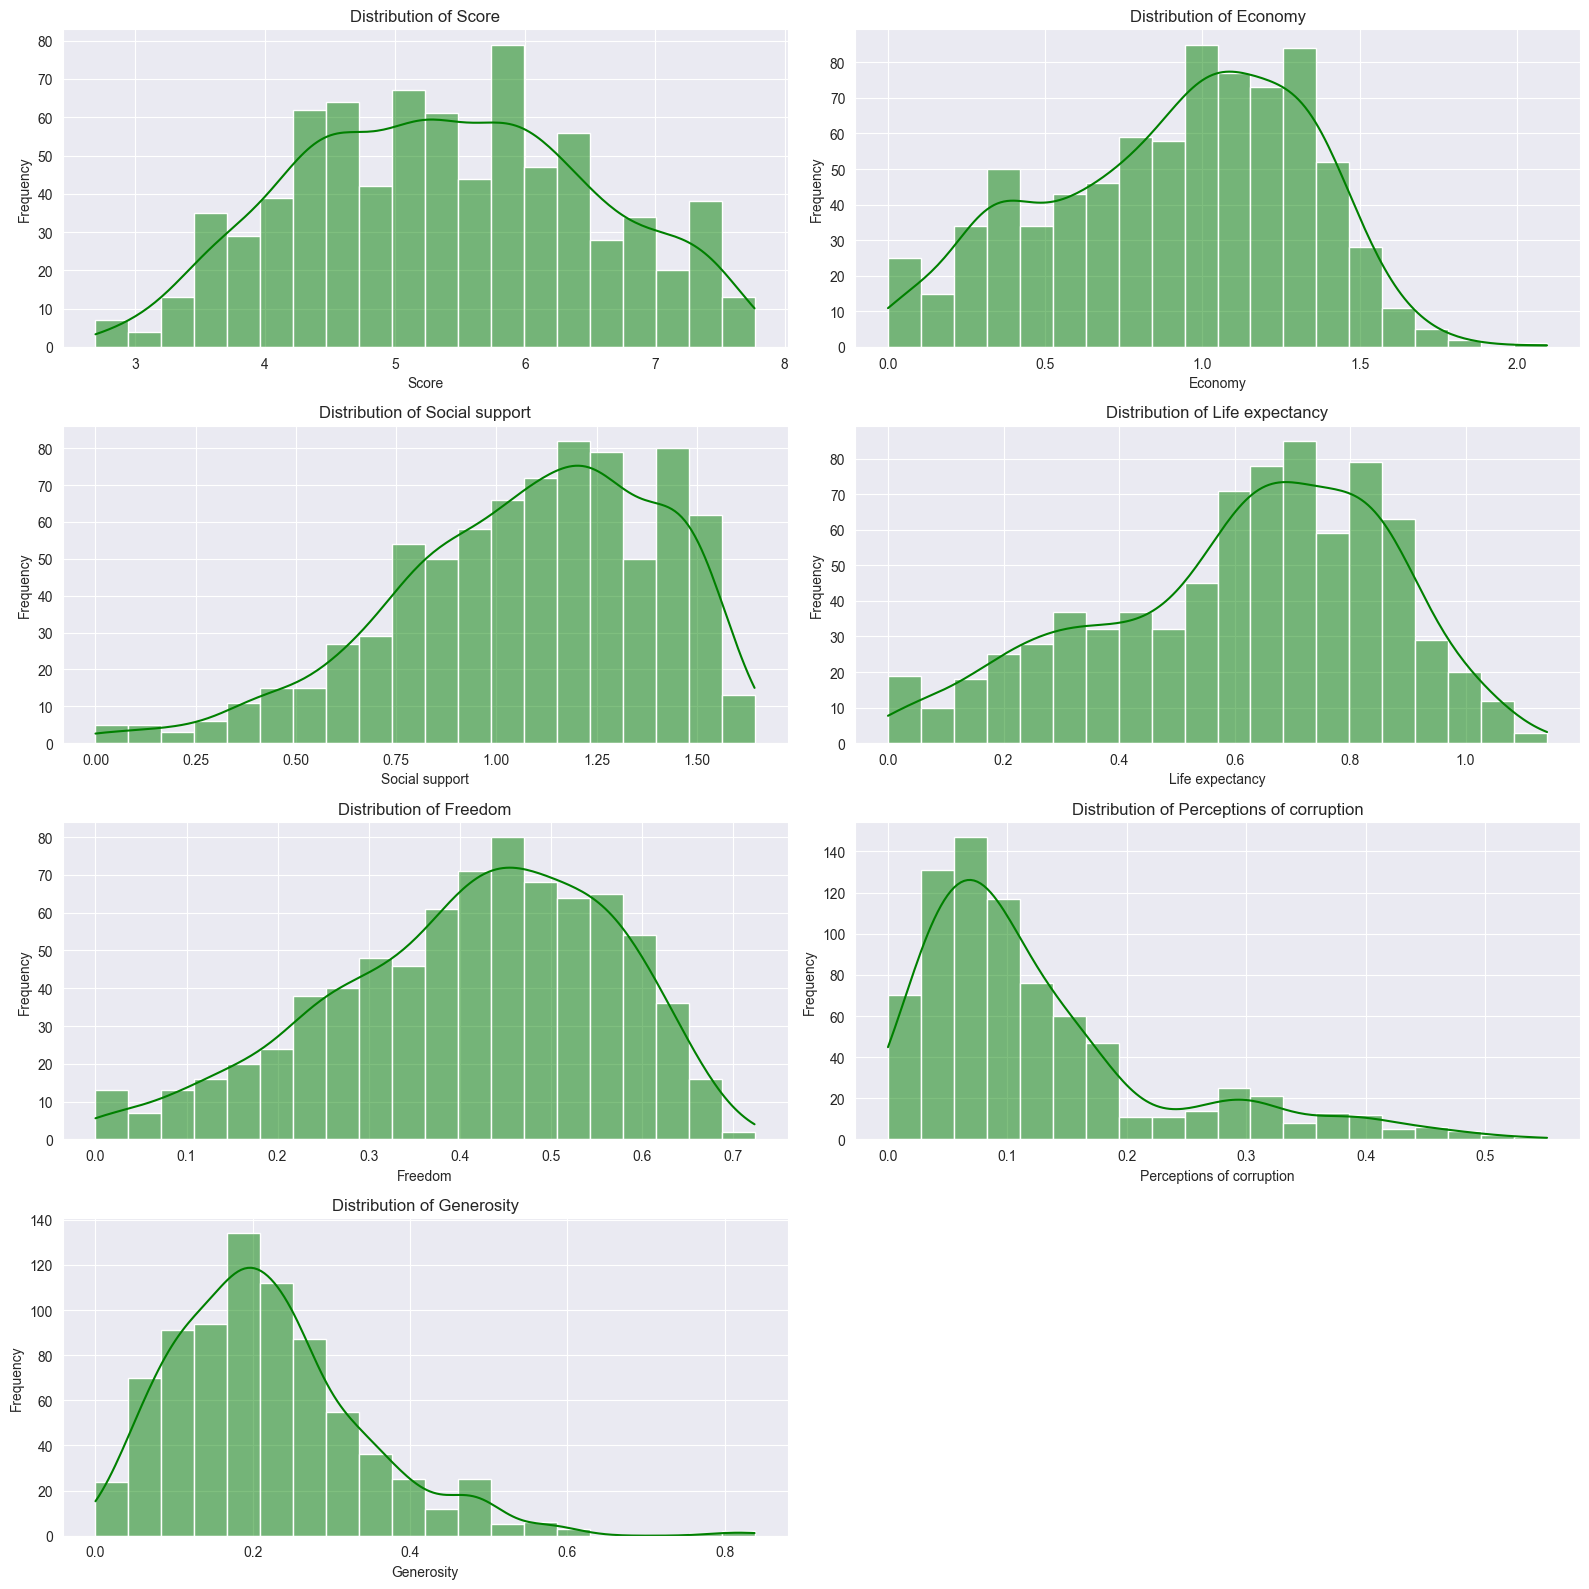

In [113]:
# Histogram for each numeric column
numeric_features = ['Score', 'Economy', 'Social support', 'Life expectancy', 'Freedom', 
                    'Perceptions of corruption', 'Generosity']

# Calculate the number of rows needed (ceiling division)
import math
num_rows = math.ceil(len(numeric_features) / 2)

# Create a figure with subplots in 2 columns
plt.figure(figsize=(16, 4 * num_rows))

# Plot histograms in a 2-column grid
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(df_combined[feature], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

- Observations revealed that several features, such as Economy ,Generosity, Social Support, Distribution of freedom are not uniformly distributed.
- This highlights the need to normalize the data using techniques like standard scaling during preprocessing


### 5.3. Correlation Analysis
- Correlation analysis identifies the strength and direction of relationships between variables.
- A correlation matrix was computed for the training data, displaying how each feature correlates with the target (Score) and other features.



In [92]:
# Combine X_train and y_train for correlation analysis
train_data = X_train.copy()
train_data['Score'] = y_train  # Add the target column back for correlation

# Compute correlations
correlation = train_data.corr()
score_corr = correlation['Score'].sort_values(ascending=False)
print("Correlation of Features with Score:")
print(score_corr)


Correlation of Features with Score:
Score                        1.000000
Economy                      0.789818
Life expectancy              0.749292
Social support               0.644567
Freedom                      0.577345
Perceptions of corruption    0.440343
Generosity                   0.156041
Name: Score, dtype: float64


#### 5.3.1. Key Findings
- Economy has the strongest positive correlation with Score (0.79), followed by Life expectancy (0.75) and Social support (0.64).
- Generosity showed the weakest correlation (0.16), indicating it may play a lesser role in determining happiness scores

#### 5.3.2. Heatmap
A heatmap was plotted to visualize these correlations, making it evident that most features positively influence the happiness score, except for Generosity, which has minimal impact.


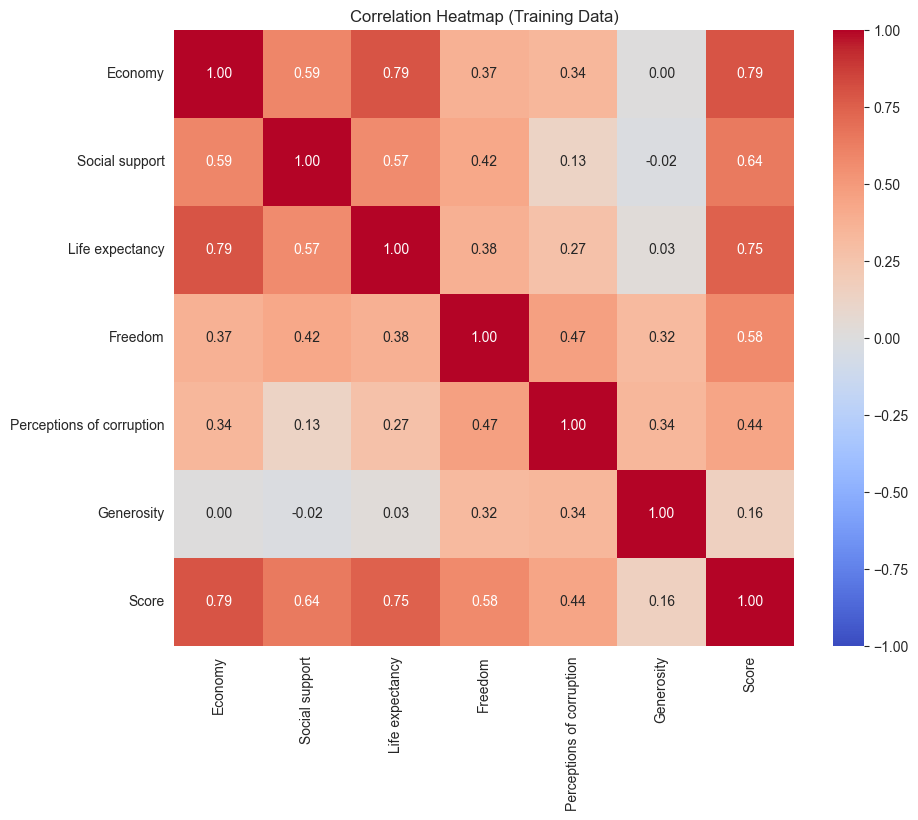

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Training Data)')
plt.show()

### 5.4. Scatter Plots
Scatter plots further explore relationships between specific variables:

#### 5.4.1. Happiness Score vs. Economy

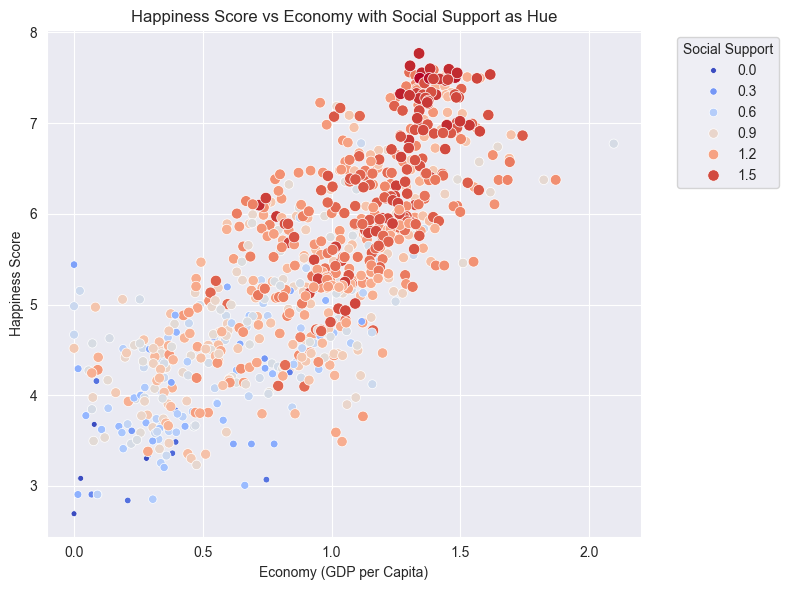

In [94]:
# Scatterplot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df_combined, 
    x='Economy', 
    y='Score', 
    hue='Social support', 
    palette='coolwarm', 
    size='Social support', 
)

# Adding titles and labels
plt.title('Happiness Score vs Economy with Social Support as Hue')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

# Legend for hue
plt.legend(title='Social Support', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

- The above scatterplot demonstrated a clear positive relationship between economic output (Economy) and happiness scores.
- Social Support was used as a hue to reveal its influence. The visualization indicated that countries with higher economic output and strong social support tend to report higher happiness scores.

#### 5.4.2. Hapiness Score vs. Life Expectancy

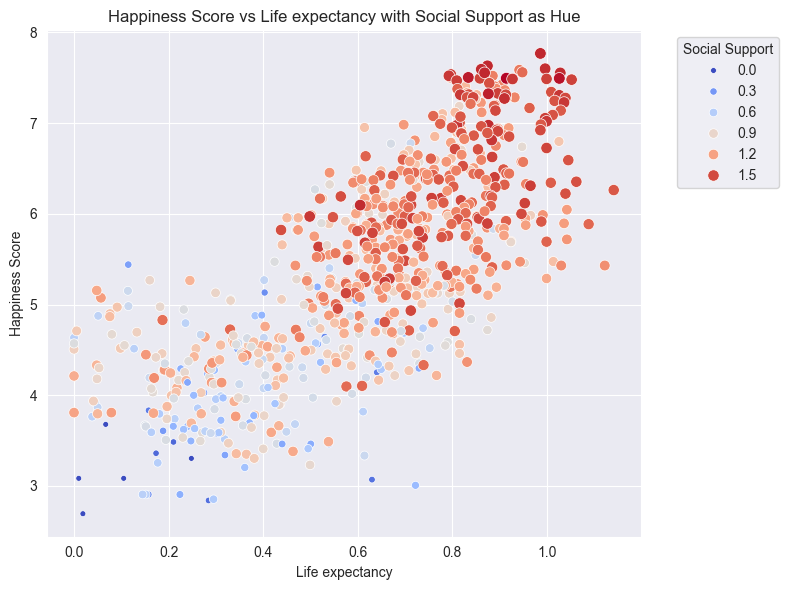

In [95]:
# Scatterplot
plt.figure(figsize=(8, 6))
scatter2 = sns.scatterplot(
    data=df_combined, 
    x='Life expectancy', 
    y='Score', 
    hue='Social support', 
    palette='coolwarm', 
    size='Social support', 
)

# Adding titles and labels
plt.title('Happiness Score vs Life expectancy with Social Support as Hue')
plt.xlabel('Life expectancy')
plt.ylabel('Happiness Score')

# Legend for hue
plt.legend(title='Social Support', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

- The above scatterplot illustrated a strong association between life expectancy and happiness.
- Again, Social Support was a key differentiator, showing that populations with higher life expectancy and better social networks score higher on happiness.

# 6. Data Pre Processing

Data preprocessing is a crucial step in preparing the dataset for machine learning. It involves handling missing values, standardizing features, and ensuring that the data is suitable for model training and testing. Below is a detailed explanation of the preprocessing steps that we followed.

- First we checked the dimensions of the training dataset as shown below.


In [96]:
X_train.shape

(625, 6)

- Then we identified what are the features in our training dataset.

In [97]:
X_train.columns

Index(['Economy', 'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')

## 6.1.  Identifying and Handling Missing Values
- Missing values can lead to errors or biased predictions if left unaddressed. Imputing missing values ensures the dataset remains consistent and usable.
-  During the Exploratory Data Analysis (EDA), we identified one missing value in the Perceptions of corruption column. Since this feature is numeric, we employed mean imputation to fill in the missing value.
- Mean imputation replaces missing values with the average value of the respective column, which minimizes the potential for bias compared to dropping rows or using arbitrary placeholders.

In [98]:
from sklearn.impute import SimpleImputer
# Using SimpleImputer to fill missing values in 'Perceptions of corruption' column with mean
imputer = SimpleImputer(strategy='mean')
X_train['Perceptions of corruption'] = imputer.fit_transform(X_train[['Perceptions of corruption']])

- After imputation, we rechecked the dataset to confirm the absence of null values.

In [99]:
# Check for null values
print("Missing Values:\n")
print(X_train.isnull().sum())

Missing Values:

Economy                      0
Social support               0
Life expectancy              0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
dtype: int64


- By imputing the missing value, we ensured the dataset remains complete and suitable for further processing.

## 6.2. Standardizing the Features

- Standardization ensures that all features have comparable scales, which is essential for many machine learning algorithms. Without standardization, features with larger numerical ranges might dominate the model, leading to suboptimal performance.
- Features in the dataset, such as Economy and Generosity, have varying scales.
- Standardization transforms the data to have a mean of 0 and a standard deviation of 1, ensuring each feature contributes equally during model training.

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())

    Economy  Social support  Life expectancy   Freedom  \
0 -0.459626       -1.017018        -0.501150  0.822553   
1  0.244850        0.081466         0.638996 -0.699790   
2 -0.239036       -0.613979        -0.560447  0.884850   
3  0.571658        0.544270         0.496381 -1.303490   
4 -1.340342        0.044334        -1.461093 -0.045939   

   Perceptions of corruption  Generosity  
0                  -0.317122   -0.398504  
1                  -1.109223   -0.821418  
2                  -0.086203   -0.040081  
3                  -1.094279   -1.564862  
4                  -0.260732   -0.718954  


- After scaling, the features are on a similar scale, enabling the machine learning models to perform optimally without being biased toward certain features with larger numerical ranges.

# 7. Model Implementation

- Model implementation involves applying machine learning algorithms to the prepared dataset to build predictive models. In this section, we focus on implementing two regression models: Linear Regression and Random Forest Regressor.

## 7.1. Linear Regression Model Implementation

- Linear Regression is one of the simplest and most interpretable machine learning algorithms. It models the relationship between the independent variables (features) and the dependent variable (target) by fitting a linear equation to the data.

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LR_train_score = linear_regressor.score(X_train_scaled,y_train)
print("Trained Linear Regression model score",LR_train_score)


Trained Linear Regression model score 0.7710623468512149


## 7.2. Random Forest Regressor Model Implementation

- Random Forest is an ensemble learning algorithm that uses multiple decision trees to improve prediction accuracy and reduce the risk of overfitting. It is well-suited for both regression and classification tasks.

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_scaled, y_train)
RF_train_score = rf_regressor.score(X_train_scaled,y_train)
print("Trained Random Forest model score",RF_train_score)


Trained Random Forest model score 0.9726136318201941


# 8. Model Evaluation and Discussion
- Model evaluation involves assessing the performance of trained models on unseen data using appropriate evaluation metrics. This section presents the evaluation of both Linear Regression and Random Forest Regressor models. Additionally, we explore ways to enhance model performance using techniques like feature engineering, polynomial regression, Ridge Regression, hyperparameter tuning, and cross-validation.

### 8.1. $R^2$ score 

- The $R^2$ score measures how well the model predicts the target variable.
- It represents the proportion of variance in the dependent variable that is explained by the independent variables.

In [103]:
# for linear regressor
LR_score = linear_regressor.score(X_test_scaled, y_test)
# for random forest regressor
RF_score = rf_regressor.score(X_test_scaled, y_test)

print("R2 score of linear regressor", LR_score)
print("R2 score of random forest regressor", RF_score)


R2 score of linear regressor 0.7289930162383139
R2 score of random forest regressor 0.7879583786218958



-  The Linear Regression model achieved an $R^2$ score of 0.729 on the test set, indicating that approximately 72.9% of the variance in the target variable is explained by the model.
- The Random Forest Regressor slightly outperformed Linear Regression, achieving an $R^2$ score of 0.788 on the test set.

### 8.2. Mean Squared Error ($MSE$)
- The Mean Squared Error measures the average squared difference between the predicted and actual values.
- A lower MSE indicates better performance.

In [104]:
# for linear regression
y_pred1 = linear_regressor.predict(X_test_scaled)
mse_reg = mean_squared_error(y_test, y_pred1)
print("MSE of linear regressor", mse_reg)

# for random forest regressor
y_pred2 = rf_regressor.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred2)
print("MSE of random forest regressor", mse_rf)

MSE of linear regressor 0.3296469920308326
MSE of random forest regressor 0.2579228095985134


- The MSE for the Linear Regression model was computed as 0.3296.
- The MSE for the Random Forest model was lower, at 0.2579, suggesting better predictions compared to Linear Regression.

### 8.3. Root Mean Squared Error $(RMSE)$
- RMSE is the square root of MSE and provides an interpretable metric in the same unit as the target variable.
- It quantifies the average error magnitude.

In [105]:
from sklearn.metrics import root_mean_squared_error

# for linear regression model
rmse_reg = root_mean_squared_error(y_test, y_pred1)
print("RMSE of linear regressor", rmse_reg)

# for random forest regressor model
rmse_rf = root_mean_squared_error(y_test, y_pred2)
print("RMSE of random forest regressor", rmse_rf)

RMSE of linear regressor 0.5741489284417699
RMSE of random forest regressor 0.5078610140565166


- The RMSE for the Linear Regression model was computed as 0.5753.
- The RMSE for the Random Forest model was lower, at 0.5075, suggesting better predictions compared to Linear Regression.

### 8.4. Mean Absolute Error $(MAE)$
- The Mean Absolute Error computes the average absolute difference between predicted and actual values, providing an intuitive understanding of the prediction accuracy.

In [106]:
from sklearn.metrics import mean_absolute_error
# for linear regression
mae_reg = mean_absolute_error(y_test, y_pred1)
print("MAE of linear regressor", mae_reg)

# for random forest regression
mae_rf = mean_absolute_error(y_test, y_pred2)
print("MAE of random forest regressor", mae_rf)

MAE of linear regressor 0.4415375445571439
MAE of random forest regressor 0.3929913970192198


- On average linear regression model misses the correct value by 0.4415 and random forest regressor misses the correct value by 0.3929
- We can see that without any hyperparameter tuning or feature engineering the linear regression model got 0.72 $R^2$ score and random forest regressor got 0.78 $R^2$ score.
- But we can add some polynomial features to capture non-linear relationships.

### 8.5 Feature Engineering and Polynomial Regression

- To enhance the performance of Linear Regression, polynomial features of degree 2 were introduced to capture non-linear relationships. 

In [107]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


linear_regressor.fit(X_train_poly, y_train)
y_pred_poly = linear_regressor.predict(X_test_poly)

# Evaluating the model
poly_score = r2_score(y_test, y_pred_poly)
print(f"R2 Score for linear regression with Polynomial Features: {poly_score}")



R2 Score for linear regression with Polynomial Features: 0.7373383693956318


- The updated model yielded an improved $R^2$ score of 0.737, demonstrating the potential of polynomial regression in handling non-linear patterns.

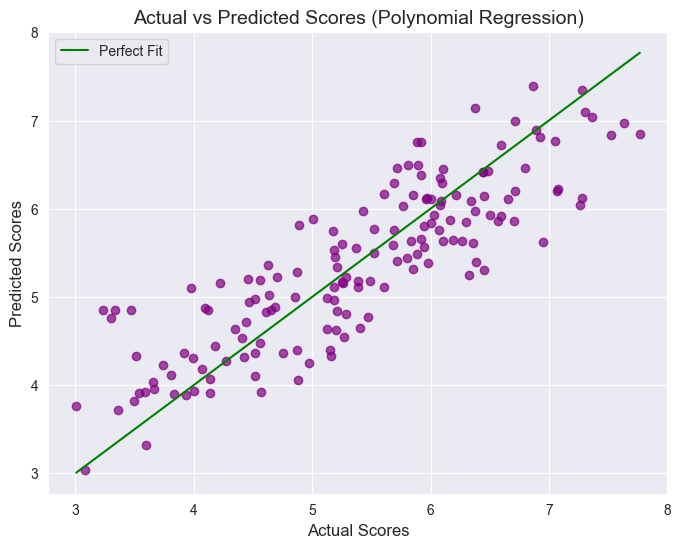

In [108]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Scores', fontsize=12)
plt.ylabel('Predicted Scores', fontsize=12)
plt.title('Actual vs Predicted Scores (Polynomial Regression)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### 8.6 Ridge Regression

- Ridge Regression was applied to further refine the Linear Regression model by penalizing large coefficients and reducing overfitting.

In [109]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2.0)  
ridge.fit(X_train_scaled, y_train)
ridge_score = ridge.score(X_test_scaled, y_test)
print(f"R2 Score with Ridge Regression: {ridge_score}")


R2 Score with Ridge Regression: 0.728764974673477


- The Ridge Regression model achieved an $R^2$ score of 0.729 on the test set, comparable to the base Linear Regression model.

### 8.7 Hyperparameter Tuning for Random Forest Regressor

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid with additional tuning suggestions
param_grid = {
    'n_estimators': [100, 200, 300],  # Consider a wider range of trees
    'max_depth': [10, 20, 30, None],  # Limit depth or allow unbounded trees
    'min_samples_split': [10, 15, 20],  # Larger split size to avoid overfitting
    'min_samples_leaf': [2, 4, 6],  # Increase minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Reduce features considered at each split
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R2 Score: {grid_search.best_score_}")

# Use the best model for prediction
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
best_rf_score = r2_score(y_test, y_pred_best_rf)

# Final R2 Score
print(f"R2 Score with Best Random Forest Model on Test Set: {best_rf_score}")


E:\python\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation R2 Score: 0.7960596550030603
R2 Score with Best Random Forest Model on Test Set: 0.7775562242241185


- Hyperparameter tuning was performed using Grid Search to optimize the Random Forest model. 
- The best parameters identified were:
    - n_estimators: 200
    - max_depth: 20
    - min_samples_split: 10
    - min_samples_leaf: 2
    - max_features: sqrt
- Despite these optimizations, the test set $R^2$ score (0.778) was slightly lower than the base Random Forest model.
- This result highlights that hyperparameter tuning does not always guarantee performance improvements and depends on data characteristics.

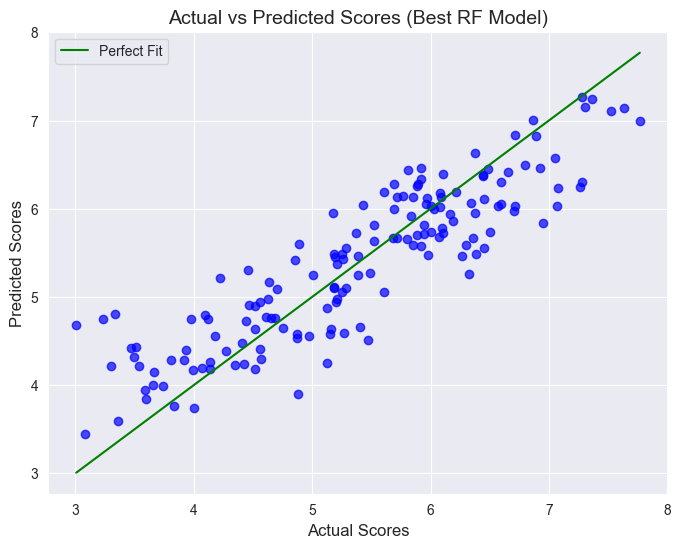

In [111]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Scores', fontsize=12)
plt.ylabel('Predicted Scores', fontsize=12)
plt.title('Actual vs Predicted Scores (Best RF Model)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


- Although we used the grid search, the R2 score we got is less than the regular random forest model. Therefore, we cross validate the random forest regressor

### 8.8. Cross-Validation for Random Forest
- To ensure robust model evaluation, a 10-fold cross-validation was performed on the Random Forest Regressor.

In [112]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=10, scoring='r2', n_jobs=-1)
print(f"Cross-Validated R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean()}")


Cross-Validated R2 Scores: [0.81653364 0.83025132 0.65705741 0.80153996 0.82335938 0.79364138
 0.80707974 0.73071459 0.85214604 0.81218226]
Mean R2 Score: 0.7924505723649804


- The mean $R^2$ score across folds was 0.7925, which was higher than both the base and tuned Random Forest models. 
- Cross-validation provides a more reliable estimate of model performance by evaluating it on multiple subsets of the data.

# 9. Model Performance Analysis

### 9.1. Linear Regression Model

- **Performance Evaluation Metrics:**
  - **Training Score:** 0.7711
  - **R² Score (Test Set):** 0.7290
  - **Mean Squared Error (MSE):** 0.3296
  - **Root Mean Squared Error (RMSE):** 0.5741
  - **Mean Absolute Error (MAE):** 0.4415
  - **Extensions:**
    - **Polynomial Features:** R² Score improved to 0.7373
    - **Ridge Regression:** R² Score was 0.7288

- **Observations:**
  - Linear regression provides a solid baseline performance but struggles with non-linear relationships in the data.
  - Polynomial features slightly enhance model fit, while Ridge regression manages overfitting but does not significantly improve the score.



### 9.2. Random Forest Regressor Model

- **Performance Evaluation Metrics:**
  - **Training Score:** 0.9726
  - **R² Score (Test Set):** 0.7880
  - **Mean Squared Error (MSE):** 0.2579
  - **Root Mean Squared Error (RMSE):** 0.5079
  - **Mean Absolute Error (MAE):** 0.3930
  - **Cross-Validation:**
    - Cross-validated R² Scores: [0.8165, 0.8303, 0.6571, 0.8015, 0.8234, 0.7936, 0.8071, 0.7307, 0.8521, 0.8122]
    - Mean Cross-Validated R² Score: 0.7925
  - **Optimized Parameters:** 
    - `max_depth`: 20
    - `max_features`: 'sqrt'
    - `min_samples_leaf`: 2
    - `min_samples_split`: 10
    - `n_estimators`: 200
  - **Best Cross-Validation R² Score (Train Set):** 0.7961
  - **Optimized Model R² Score (Test Set):** 0.7776

- **Observations:**
  - At first Random forest regressor gave 0.9726 R2 score. It is obvious that train set was highly overfitted. But after hyper parameter tuning we were able to get 0.7961 R2 score for train set, which is not overfitted. And for test set we got 0.7776 R2 score. 
  - Random forest outperforms linear regression in all evaluation metrics on both train and test sets, demonstrating its capacity to model complex relationships.
  - The hyperparameter optimization further enhances the performance, reducing errors and improving generalization.


# 10. **Discussion**

The analysis highlights the comparative performance of the Linear Regression model and the Random Forest Regressor on the given dataset. Each model demonstrates its unique characteristics and trade-offs, as detailed below:

## 10.1. **Linear Regression**
- The Linear Regression model achieves a **training R² score of 0.7711** and a **test R² score of 0.7290**, indicating a reasonable fit for the data but limited predictive power, especially on unseen data. The error metrics such as **MSE (0.3296)**, **RMSE (0.5741)**, and **MAE (0.4415)** further confirm its limitations in handling the dataset's complexities.
- Attempts to enhance the performance through **Polynomial Features** and **Ridge Regression** show modest improvements. 
  - **Polynomial Features** capture some non-linear relationships, raising the R² score to 0.7373.
  - **Ridge Regression** effectively addresses overfitting without a significant gain in R² score (0.7288).
- These results suggest that the Linear Regression model is effective for simple, linear relationships but struggles with more intricate patterns, limiting its flexibility and accuracy.

## 10.2. **Random Forest Regressor**
- Initially, the Random Forest Regressor displayed signs of overfitting, with a **training R² score of 0.9726** compared to a **test R² score of 0.7880**. However, hyperparameter tuning mitigated this issue, achieving a balanced performance with:
  - **Cross-Validated Training R² Score:** 0.7961
  - **Test R² Score:** 0.7776
- The error metrics (**MSE: 0.2579**, **RMSE: 0.5079**, **MAE: 0.3930**) demonstrate the model's ability to minimize prediction errors effectively.
- Cross-validation further supports the model's robustness, with a **mean R² score of 0.7925** across folds, reflecting strong generalization capabilities.
- Random Forest's strength lies in its capacity to capture non-linear relationships and interactions between features, making it a versatile model for complex datasets.

## 10.3. **Key Observations**
- The Random Forest Regressor consistently outperforms Linear Regression across all evaluation metrics, highlighting its ability to model the intricate patterns in the dataset.
- Hyperparameter optimization for Random Forest significantly reduces overfitting, improving generalization while maintaining strong predictive performance.
- While Linear Regression remains a reliable baseline, it is outclassed by the Random Forest Regressor in terms of both accuracy and error minimization, especially for datasets with complex, non-linear structures.



# 11. **Conclusion**

Based on the evaluation metrics and analysis:

1. The **Linear Regression model** provides a straightforward and interpretable baseline for regression tasks but demonstrates clear limitations in handling non-linear relationships. Techniques such as **Polynomial Features** and **Ridge Regression** marginally improve its performance but fail to match the accuracy and flexibility required for the dataset.

2. The **Random Forest Regressor** proves to be a superior model for this dataset, leveraging its ensemble nature to capture complex patterns and interactions between features. 
   - Post-tuning, it achieves balanced training and testing scores, effectively addressing initial overfitting concerns.
   - Its strong cross-validation performance indicates robustness and consistent generalization ability.

3. For datasets with non-linear relationships and intricate patterns, the **Random Forest Regressor** is the preferred model due to its accuracy, error reduction capabilities, and ability to handle complex data structures. Conversely, the **Linear Regression model** may be used when simplicity, interpretability, and computational efficiency are prioritized over predictive power.



# References

W. Koehrsen, “Hyperparameter tuning the random forest in Python - towards data science,” Medium, Dec. 10, 2019. [Online]. Available: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

GeeksforGeeks, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. https://www.geeksforgeeks.org/what-is-standardscaler/

“RandomForestRegressor,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

“LinearRegression,” Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
